In [ ]:
%load_ext autoreload
%autoreload 2

# Baseline
> Conv model

In [ ]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [ ]:
PATH = Path.cwd().parent/'data'
Path.BASE_PATH = PATH

IMAGE_PATH = PATH/'UCF-101-frames'
SPLIT_PATH = PATH/'ucfTrainTestlist'

In [ ]:
files = get_sequence_paths(IMAGE_PATH)

In [ ]:
images = get_image_files(IMAGE_PATH)

In [ ]:
verify_images(get_image_files(IMAGE_PATH))

Process ForkProcess-10:
Process ForkProcess-9:
Process ForkProcess-12:
Process ForkProcess-8:
Process ForkProcess-11:
Process ForkProcess-6:
Process ForkProcess-7:
Process ForkProcess-5:
Process ForkProcess-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


## Params

In [ ]:
seq_len = 20
image_size = 64

In [ ]:
#slow
val_idxs = get_split_idxs()

In [ ]:
dls = get_action_dataloaders(files, bs=32, image_size=image_size, seq_len=seq_len, val_idxs=val_idxs, random_sample=True)

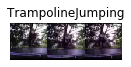

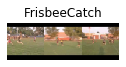

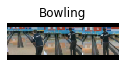

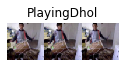

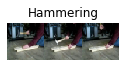

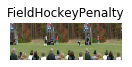

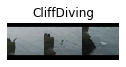

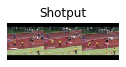

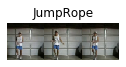

In [ ]:
dls.show_batch()

In [ ]:
model = SimpleModel(num_classes=dls.c, seq_len=seq_len)

In [ ]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.00363078061491251)

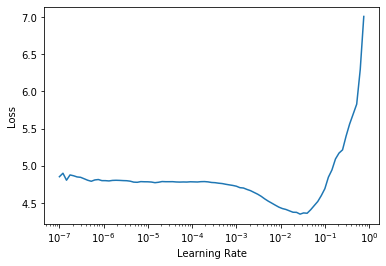

In [ ]:
# learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 1e-2)

UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 2.
Original Traceback (most recent call last):
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/home/tcapelle/Apps/fastai2/fastai2/data/load.py", line 107, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/tcapelle/Apps/fastcore/fastcore/utils.py", line 271, in chunked
    res = list(itertools.islice(it, cs))
  File "/home/tcapelle/Apps/fastai2/fastai2/data/load.py", line 120, in do_item
    try: return self.after_item(self.create_item(s))
  File "/home/tcapelle/Apps/fastai2/fastai2/data/load.py", line 126, in create_item
    def create_item(self, s):  return next(self.it) if s is None else self.dataset[s]
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 288, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 288, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 265, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/home/tcapelle/Apps/fastai2/fastai2/data/core.py", line 228, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/home/tcapelle/Apps/fastcore/fastcore/transform.py", line 187, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/home/tcapelle/Apps/fastcore/fastcore/transform.py", line 140, in compose_tfms
    x = f(x, **kwargs)
  File "/home/tcapelle/Apps/fastcore/fastcore/transform.py", line 72, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/home/tcapelle/Apps/fastcore/fastcore/transform.py", line 82, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/home/tcapelle/Apps/fastcore/fastcore/transform.py", line 86, in _do_call
    return x if f is None else retain_type(f(x, **kwargs), x, f.returns_none(x))
  File "/home/tcapelle/Apps/fastcore/fastcore/dispatch.py", line 98, in __call__
    return f(*args, **kwargs)
  File "/home/tcapelle/Documents/action_recognition/nbs/action_recognition/core.py", line 107, in encodes
    return TupleImage(tuple(PILImage.create(f) for f in sort_files(L(random.sample(list(frames), self.seq_len)))))
  File "/home/tcapelle/Documents/action_recognition/nbs/action_recognition/core.py", line 107, in <genexpr>
    return TupleImage(tuple(PILImage.create(f) for f in sort_files(L(random.sample(list(frames), self.seq_len)))))
  File "/home/tcapelle/Apps/fastai2/fastai2/vision/core.py", line 98, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/home/tcapelle/Apps/fastai2/fastai2/vision/core.py", line 74, in load_image
    im = Image.open(fn, **kwargs)
  File "/home/tcapelle/miniconda3/envs/fastai2/lib/python3.7/site-packages/PIL/Image.py", line 2862, in open
    "cannot identify image file %r" % (filename if filename else fp)
PIL.UnidentifiedImageError: cannot identify image file '/home/tcapelle/Documents/action_recognition/data/UCF-101-frames/PlayingDhol/v_PlayingDhol_g23_c06/62.jpg'


In [ ]:
learn.show_results()